### Table Of Content

- [Introduction](#Introduction)
- [Exploratory Data Analysis](#Data-Exploration)
- [Data Cleaning](#Data-Cleaning)
- [Data Preprocessing & Feature Engineering](#Feature-Engineering)
- [Model & Evaluation](#Modeling-&-evaluation)
- [Case Study](#Case-Study)
- [Conclusion](#Conclusion)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

# Introduction

Read data. Give a quick glance.

In [4]:
df = pd.read_csv("data/UCI_Credit_Card.csv")
df.shape

(30000, 25)

In [5]:
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

categorical variables: SEX, EDUCATION, MARRIAGE

In [7]:
df.groupby("SEX").count()[["ID"]]

ID
SEX       
1    11888
2    18112

In [8]:
df.groupby("EDUCATION").count()[["ID"]]

ID
EDUCATION       
0             14
1          10585
2          14030
3           4917
4            123
5            280
6             51

In [9]:
df.groupby("MARRIAGE").count()[["ID"]]

ID
MARRIAGE       
0            54
1         13659
2         15964
3           323

- SEX (0=male, 1=female)
- EDUCATION (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
  - 0: undocumented
  - 5, 6: unlabelled
- MARRIAGE (1=married, 2=single, 3=others)
  - 0: undocumented

repayment status

(-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

In [10]:
dfs = []
for col in ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]:
    sub = df.groupby(col).count()[["ID"]].reset_index()
    dfs.append(sub)
pd.concat(dfs, axis=1)

PAY_0     ID  PAY_2     ID  PAY_3     ID  PAY_4     ID  PAY_5       ID  \
0      -2   2759     -2   3782     -2   4085     -2   4348   -2.0   4546.0   
1      -1   5686     -1   6050     -1   5938     -1   5687   -1.0   5539.0   
2       0  14737      0  15730      0  15764      0  16455    0.0  16947.0   
3       1   3688      1     28      1      4      1      2    2.0   2626.0   
4       2   2667      2   3927      2   3819      2   3159    3.0    178.0   
5       3    322      3    326      3    240      3    180    4.0     84.0   
6       4     76      4     99      4     76      4     69    5.0     17.0   
7       5     26      5     25      5     21      5     35    6.0      4.0   
8       6     11      6     12      6     23      6      5    7.0     58.0   
9       7      9      7     20      7     27      7     58    8.0      1.0   
10      8     19      8      1      8      3      8      2    NaN      NaN   

    PAY_6       ID  
0    -2.0   4895.0  
1    -1.0   5740.0  
2     0.0  16286.0  
3     2.0   2766.0  
4     3.0    184.0  
5     4.0     49.0  
6     5.0     13.0  
7     6.0     19.0  
8     7.0     46.0  
9     8.0      2.0  
10    NaN      NaN

There are undocumenteded label `-2` and `0`.
If 1, 2, 3, etc means the months of delay, 0 and negative value should be seen as `-1`.

*Note that, `PAY_n` equals to 1 is anomalous. The delay payment of every month has a similar trending except for 1 (pay delay 1 month).

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

...

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

In [11]:
df[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]].describe().astype(int)

BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6
count      30000      30000      30000      30000      30000      30000
mean       51223      49179      47013      43262      40311      38871
std        73635      71173      69349      64332      60797      59554
min      -165580     -69777    -157264    -170000     -81334    -339603
25%         3558       2984       2666       2326       1763       1256
50%        22381      21200      20088      19052      18104      17071
75%        67091      64006      60164      54506      50190      49198
max       964511     983931    1664089     891586     927171     961664

negative value means...? need to be investigated

previous payment

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

...

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

In [12]:
df[["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]].describe().astype(int)

PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6
count     30000     30000     30000     30000     30000     30000
mean       5663      5921      5225      4826      4799      5215
std       16563     23040     17606     15666     15278     17777
min           0         0         0         0         0         0
25%        1000       833       390       296       252       117
50%        2100      2009      1800      1500      1500      1500
75%        5006      5000      4505      4013      4031      4000
max      873552   1684259    896040    621000    426529    528666

AGE

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

In [13]:
df[["AGE", "LIMIT_BAL"]].describe()

AGE       LIMIT_BAL
count  30000.000000    30000.000000
mean      35.485500   167484.322667
std        9.217904   129747.661567
min       21.000000    10000.000000
25%       28.000000    50000.000000
50%       34.000000   140000.000000
75%       41.000000   240000.000000
max       79.000000  1000000.000000

default.payment.next.month: Default payment (1=yes, 0=no)

In [14]:
df.groupby("default.payment.next.month").count()[["ID"]]

ID
default.payment.next.month       
0                           23364
1                            6636

In [15]:
df.rename(columns={"default.payment.next.month": "def_pay"}, inplace=True)

In [16]:
# default probability
df["def_pay"].sum() / df.shape[0]

0.2212

# Data Exploration

categorical variables: MARRIAGE, SEX, EDUCATION

<AxesSubplot:xlabel='MARRIAGE'>

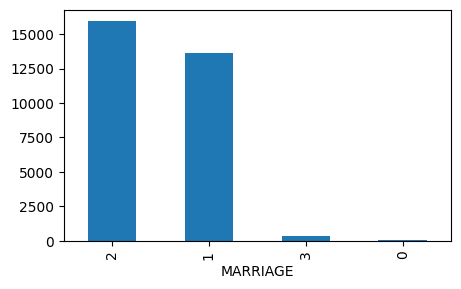

In [17]:
df["MARRIAGE"].value_counts().plot(kind="bar", figsize=(5, 3))

numerical variables

In [18]:
def draw_histograms(df, n_rows, n_cols):
    variables = df.columns.to_list()
    fig, axs = plt.subplots(n_rows, n_cols)
    fig.suptitle("BILL_AMT*")

    var = 0
    for i in range(n_rows):
        for j in range(n_cols):
            name = variables[var]
            df[name].hist(bins=20, ax=axs[i, j])
            axs[i, j].set_title(name)
            var += 1
    plt.tight_layout()
    plt.show()

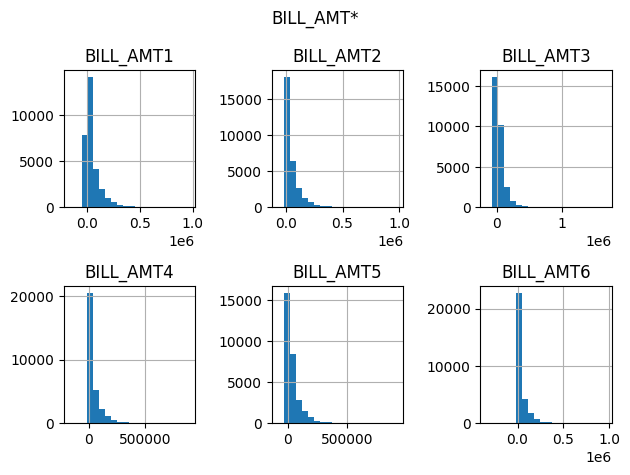

In [19]:
sub = df[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]]
draw_histograms(sub, 2, 3)

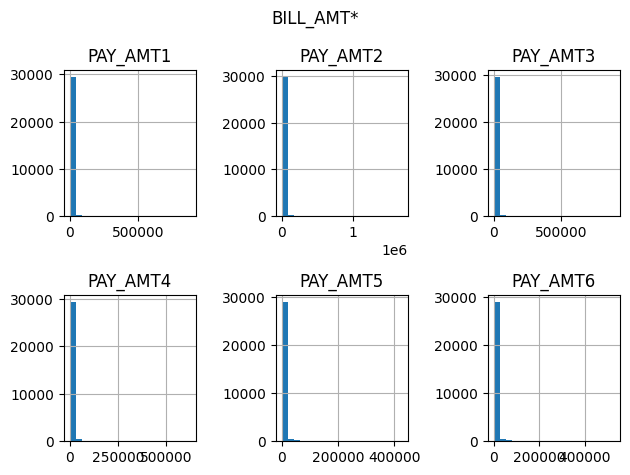

In [20]:
sub = df[["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]]
draw_histograms(sub, 2, 3)

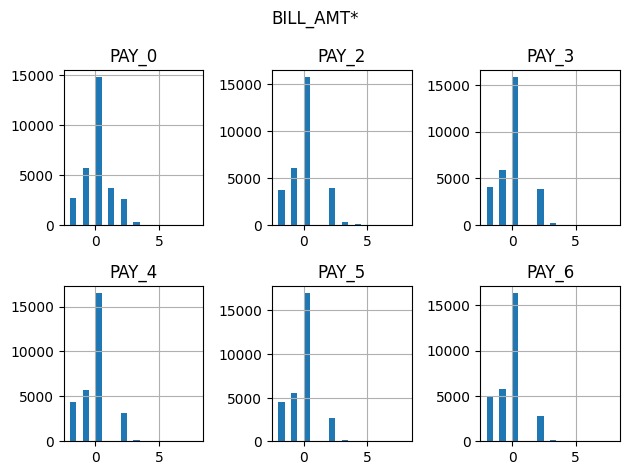

In [21]:
sub = df[["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]]
draw_histograms(sub, 2, 3)

<AxesSubplot:>

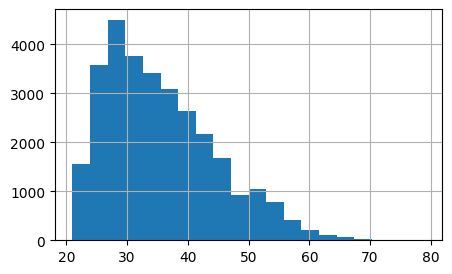

In [22]:
df["AGE"].hist(bins=20, figsize=(5, 3))

<AxesSubplot:>

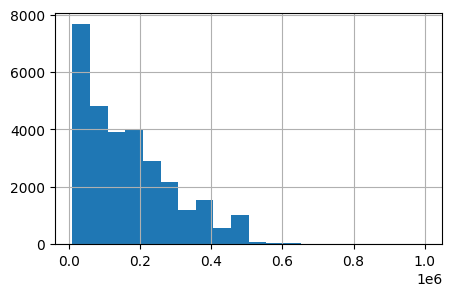

In [23]:
df["LIMIT_BAL"].hist(bins=20, figsize=(5, 3))

some variables have a very large range. We need do feature engineering before feed into model.

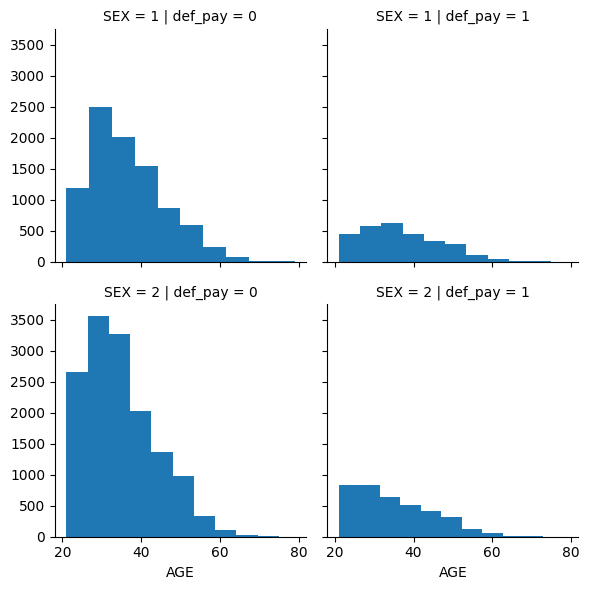

In [24]:
g = sns.FacetGrid(df, col="def_pay", row="SEX")
g.map(plt.hist, "AGE")

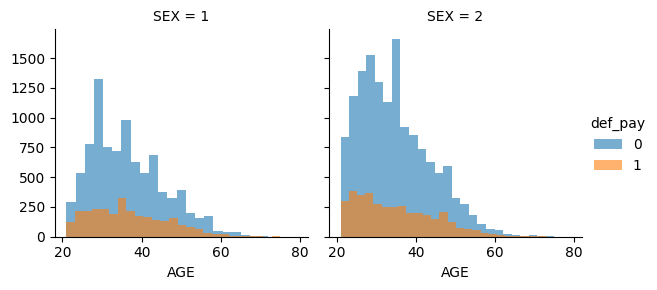

In [25]:
g = sns.FacetGrid(df, col="SEX", hue="def_pay")
g.map(plt.hist, "AGE", alpha=0.6, bins=25)
g.add_legend()

# Data Cleaning

fix unlabel, undocument or missing values

- marriage (1=married, 2=single, 3=others)

  0: undocumented, can be categorize to 3

In [26]:
df.groupby("MARRIAGE").count()[["ID"]]

ID
MARRIAGE       
0            54
1         13659
2         15964
3           323

In [27]:
df.loc[df["MARRIAGE"]==0, "MARRIAGE"] = 3

In [28]:
df.groupby("MARRIAGE").count()[["ID"]]

ID
MARRIAGE       
1         13659
2         15964
3           377

- EDUCATION (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

  0: undocumented, 5, 6: unlabelled can be categorize to 4

In [29]:
df.groupby("EDUCATION").count()[["ID"]]

ID
EDUCATION       
0             14
1          10585
2          14030
3           4917
4            123
5            280
6             51

In [30]:
df.loc[df["EDUCATION"].isin([0, 5, 6]), "EDUCATION"] = 4

In [31]:
df.groupby("EDUCATION").count()[["ID"]]

ID
EDUCATION       
1          10585
2          14030
3           4917
4            468

- PAY_n: the number of months of delay payment and -1 indicates pay duly.

  1: is un-usual. maybe we should throw it away.
  
  0 and -2 can be treated as -1.

In [32]:
df.loc[df["PAY_0"].isin([-2, 0]), "PAY_0"] = -1
df.loc[df["PAY_2"].isin([-2, 0]), "PAY_2"] = -1
df.loc[df["PAY_3"].isin([-2, 0]), "PAY_3"] = -1
df.loc[df["PAY_4"].isin([-2, 0]), "PAY_4"] = -1
df.loc[df["PAY_5"].isin([-2, 0]), "PAY_5"] = -1
df.loc[df["PAY_6"].isin([-2, 0]), "PAY_6"] = -1

In [33]:
dfs = []
for col in ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]:
    sub = df.groupby(col).count()[["ID"]].reset_index()
    dfs.append(sub)
pd.concat(dfs, axis=1)

PAY_0     ID  PAY_2     ID  PAY_3     ID  PAY_4     ID  PAY_5       ID  \
0     -1  23182     -1  25562     -1  25787     -1  26490   -1.0  27032.0   
1      1   3688      1     28      1      4      1      2    2.0   2626.0   
2      2   2667      2   3927      2   3819      2   3159    3.0    178.0   
3      3    322      3    326      3    240      3    180    4.0     84.0   
4      4     76      4     99      4     76      4     69    5.0     17.0   
5      5     26      5     25      5     21      5     35    6.0      4.0   
6      6     11      6     12      6     23      6      5    7.0     58.0   
7      7      9      7     20      7     27      7     58    8.0      1.0   
8      8     19      8      1      8      3      8      2    NaN      NaN   

   PAY_6       ID  
0   -1.0  26921.0  
1    2.0   2766.0  
2    3.0    184.0  
3    4.0     49.0  
4    5.0     13.0  
5    6.0     19.0  
6    7.0     46.0  
7    8.0      2.0  
8    NaN      NaN

### Further analysis

To see how relevant each feature is.

corrleation between gender and default payment

In [34]:
gender = df.groupby(["SEX", "def_pay"]).size().unstack()
gender

def_pay      0     1
SEX                 
1         9015  2873
2        14349  3763

<AxesSubplot:xlabel='SEX'>

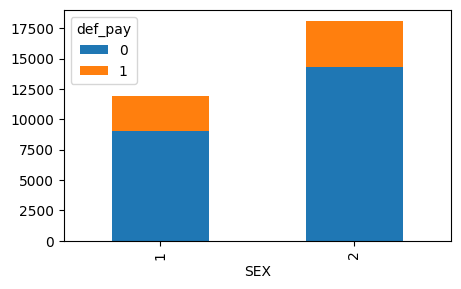

In [35]:
gender.plot(kind="bar", stacked=True, figsize=(5, 3))

In [36]:
gender["percentage"] = gender[1] / (gender[0] + gender[1])

In [37]:
gender

def_pay      0     1  percentage
SEX                             
1         9015  2873    0.241672
2        14349  3763    0.207763

Until now,
1. There are significantly more women than men.
2. Men are more likely going to default payment.

This is just a simple aspect of the data. We need to dig deeper.

In [38]:
def corr_cols(col1, col2):
    res = df.groupby([col1, col2]).size().unstack()
    c1 = res.columns[1]
    c0 = res.columns[0]
    res["percentage"] = res[c1] / (res[c0] + res[c1])
    return res

In [39]:
corr_cols("EDUCATION", "def_pay")

def_pay        0     1  percentage
EDUCATION                         
1           8549  2036    0.192348
2          10700  3330    0.237349
3           3680  1237    0.251576
4            435    33    0.070513

In [40]:
corr_cols("MARRIAGE", "def_pay")

def_pay       0     1  percentage
MARRIAGE                         
1         10453  3206    0.234717
2         12623  3341    0.209283
3           288    89    0.236074

In [41]:
df[df["PAY_0"] < 0][["LIMIT_BAL", "PAY_0", "BILL_AMT1", "PAY_AMT1", "def_pay"]].sort_values(["def_pay"], ascending=False)

LIMIT_BAL  PAY_0  BILL_AMT1  PAY_AMT1  def_pay
1       120000.0     -1     2682.0       0.0        1
11952   200000.0     -1     2896.0   10720.0        1
11995   180000.0     -1     2619.0    1839.0        1
11984   470000.0     -1     1689.0     499.0        1
11981   200000.0     -1     9754.0   56243.0        1
...          ...    ...        ...       ...      ...
12659   240000.0     -1     4890.0    4164.0        0
12658   210000.0     -1     6769.0   12660.0        0
12657   290000.0     -1   118801.0    3530.0        0
12656    70000.0     -1    58875.0       0.0        0
15156    70000.0     -1    32244.0    1841.0        0

[23182 rows x 5 columns]

Invest how does `PAY_n` be assigned.

In [42]:
df[(df["PAY_0"] < 0)][["LIMIT_BAL", "PAY_0", "BILL_AMT2", "PAY_AMT1", "BILL_AMT3", "PAY_AMT2", "def_pay"]]

LIMIT_BAL  PAY_0  BILL_AMT2  PAY_AMT1  BILL_AMT3  PAY_AMT2  def_pay
1       120000.0     -1     1725.0       0.0     2682.0    1000.0        1
2        90000.0     -1    14027.0    1518.0    13559.0    1500.0        0
3        50000.0     -1    48233.0    2000.0    49291.0    2019.0        0
4        50000.0     -1     5670.0    2000.0    35835.0   36681.0        0
5        50000.0     -1    57069.0    2500.0    57608.0    1815.0        0
...          ...    ...        ...       ...        ...       ...      ...
29992    10000.0     -1    10400.0    2000.0        0.0       0.0        0
29993   100000.0     -1     1427.0    2000.0   102996.0  111784.0        0
29995   220000.0     -1   192815.0    8500.0   208365.0   20000.0        0
29996   150000.0     -1     1828.0    1837.0     3502.0    3526.0        0
29999    50000.0     -1    48905.0    2078.0    49764.0    1800.0        1

[23182 rows x 7 columns]

Maybe `PAY_n` could be seen as late/not-late payment, rather than categorize into that many labels.

Let's keep it as present and experiment which way is better.

# Feature Engineering

In [43]:
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer, LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer

In [44]:
# categorical: SEX x MARRIAGE features
fea_sex_marr = []
for i in set(df["SEX"]):
    for j in set(df["MARRIAGE"]):
        idx = df[(df["SEX"] == i) & (df["MARRIAGE"] == j)].index
        print(f"SEX={i} MARRIAGE={j} size={len(idx)}")
        a = np.zeros(df.shape[0])
        a[idx] = 1
        fea_sex_marr.append(a)
fea_sex_marr = np.array(fea_sex_marr).transpose()
fea_sex_marr.shape

SEX=1 MARRIAGE=1 size=5190
SEX=1 MARRIAGE=2 size=6553
SEX=1 MARRIAGE=3 size=145
SEX=2 MARRIAGE=1 size=8469
SEX=2 MARRIAGE=2 size=9411
SEX=2 MARRIAGE=3 size=232


(30000, 6)

In [45]:
# categorical: MARRIAGE
marr_encoder = LabelBinarizer()
fea_marr = marr_encoder.fit_transform(df["MARRIAGE"].values)
fea_marr.shape

(30000, 3)

In [46]:
# categorical: SEX
sex_encoder = LabelBinarizer()
fea_sex = sex_encoder.fit_transform(df["SEX"].values)
fea_sex.shape

(30000, 1)

In [47]:
# categorical: EDUCATION
edu_encoder = LabelBinarizer()
fea_edu = edu_encoder.fit_transform(df["EDUCATION"].values)
fea_edu.shape

(30000, 4)

In [48]:
# categorical: AGE
age_bin = pd.cut(df["AGE"], [19, 29, 39, 49, 59, 100])
age_bin_encoder = LabelEncoder()
fea_age_bin = age_bin_encoder.fit_transform(age_bin.values)
fea_age_bin.shape

(30000,)

It looks like `BILL_AMT6` will be paid at `PAY_AMT5`, there is one month shift.

In [49]:
# numerical: LIMIT_BAL
limit_bin = pd.qcut(df["LIMIT_BAL"], q=4)
limit_bin_encoder = LabelEncoder()
fea_limit_bin = limit_bin_encoder.fit_transform(limit_bin.values)
fea_limit_bin.shape

(30000,)

In [50]:
# categorical: PAY_n
fea_pay = df[["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]].values
fea_pay.shape

(30000, 6)

In [51]:
# Alought the payment status of `BILL_AMT1` is unknown,
# the differnece of `BILL_AMT1`+delay payment and `LIMIT_BAL` may affect default payment at next month.
# numerical: quota
expense = \
df["BILL_AMT6"] - df["PAY_AMT5"] + \
df["BILL_AMT5"] - df["PAY_AMT4"] + \
df["BILL_AMT4"] - df["PAY_AMT3"] + \
df["BILL_AMT3"] - df["PAY_AMT2"] + \
df["BILL_AMT2"] - df["PAY_AMT1"] + \
df["BILL_AMT1"]

df_exp = pd.DataFrame(
    np.vstack((df["LIMIT_BAL"].values, expense.values)).transpose(),
    columns=["bal", "exp"]
)
df_exp["quota"] = df_exp["bal"] - df_exp["exp"]
df_exp["def_pay"] = df["def_pay"]
fea_quota = (df_exp["quota"] > 0).values * 1 # 1: has quota. 0: overdraft
fea_quota.shape

(30000,)

In [52]:
corr_cols(fea_quota, df_exp["def_pay"])

def_pay      0     1  percentage
0        12155  4197    0.256666
1        11209  2439    0.178708

In [54]:
# last month payment status. 0: pay 0, 1: paid parital, 2: paid full
def get_pay_status(bill, payment):
    if payment >= bill:
        return 2
    if payment == 0:
        return 0
    return 1
fea_pay_status = [get_pay_status(b, p) for b, p in zip(df["BILL_AMT2"], df["PAY_AMT1"])]
fea_pay_status = np.array(fea_pay_status)
fea_pay_status.shape

(30000,)

In [55]:
corr_cols(fea_pay_status, df["def_pay"])

def_pay      0     1  percentage
0         1054  1166    0.525225
1        14004  3778    0.212462
2         8306  1692    0.169234

In [ ]:
# df[[
#     "LIMIT_BAL", 
#     "BILL_AMT6", "PAY_AMT5",
#     "BILL_AMT5", "PAY_AMT4",
#     "BILL_AMT4", "PAY_AMT3",
#     "BILL_AMT3", "PAY_AMT2",
#     "BILL_AMT2", "PAY_AMT1",
#     "BILL_AMT1",
#     "def_pay"
# ]][:5]

In [56]:
# numerical: BILL_AMTn, PAY_AMTn
cols = [
    "LIMIT_BAL", 
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6",
]
transformer = ColumnTransformer([("scaler", PowerTransformer(), cols)])
fea_num = transformer.fit_transform(df)
fea_num.shape

/Users/chiachunlee/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/chiachunlee/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/chiachunlee/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


(30000, 13)

In [57]:
# combine all features
X = np.hstack((
    fea_sex_marr,
    fea_marr,
    fea_sex,
    fea_edu,
    np.reshape(fea_age_bin, (-1, 1)),
    np.reshape(fea_limit_bin, (-1, 1)),
    fea_pay,
    np.reshape(fea_quota, (-1, 1)),
    np.reshape(fea_pay_status, (-1, 1)),
    fea_num,
))
Y = df["def_pay"].values
X.shape, Y.shape

((30000, 37), (30000,))

| dim | feature | 
|--|--|
| 0 | married men|
| 1 | single men |
| 2 | others men |
| 3 | married women |
| 4 | single women |
| 5 | others women |
| 6 | married |
| 7 | single |
| 8 | others marital |
| 9 | male / female |
| 10 | graducate school |
| 11 | university |
| 12 | hgh school |
| 13 | others edu |
| 14 | age (19, 29] / (29, 39] / (39, 49] / (49, 59] / (59, ~] |
| 15 | qcut for limit bal |
| 16 | PAY_0 |
| 17 | PAY_2 |
| 18 | PAY_3 |
| 19 | PAY_4 |
| 20 | PAY_5 |
| 21 | PAY_6 |
| 22 | quota 1: has quota / 0: overdraft |
| 23 | last month 0: pay 0 / 1: paid parital / 2: paid full |
| 24~36 | transform_ LIMIT_BAL, BILL_AMTn, PAY_AMTn |

In [58]:
FEATURE_COLS = [
    "married men", "single men", "others men",
    "married women", "single women", "others women",
    "married", "single", "others marital",
    "gender", "graducate", "university", "high school", "others edu",
    "age_cate",
    "qcut_LIMIT_BAL",
    "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6",
    "quota 0/1",
    "latest_pay_status 0/1/2",
    "trans_LIMIT_BAL",
    "trans_BILL_AMT1", "trans_BILL_AMT2", "trans_BILL_AMT3",
    "trans_BILL_AMT4", "trans_BILL_AMT5", "trans_BILL_AMT6",
    "trans_PAY_AMT1", "trans_PAY_AMT2", "trans_PAY_AMT3",
    "trans_PAY_AMT4", "trans_PAY_AMT5", "trans_PAY_AMT6",
]
len(FEATURE_COLS)

37

# Modeling & evaluation

I believe that recall holds greater significance than precision.
However, when determine the most suitable metrics and identifying primary concerns, 
it is essential to engage in dicusstions with business teams.

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report

### train test split

Perhaps, it would be benificial for us to carelly partition the dataset into training, development, and test sets.This approach aims to prevente overfitting on our current dataset, as overfitting may lead to suboptimal performance in real-world scenarios.

We can employ the k-fold strategy to create a development set.

In [60]:
idx_tr, idx_te = train_test_split(np.arange(df.shape[0]), test_size=0.2, random_state=42)
idx_tr.shape, idx_te.shape

((24000,), (6000,))

In [61]:
x_tr = X[idx_tr]
x_te = X[idx_te]
y_tr = Y[idx_tr]
y_te = Y[idx_te]

In [62]:
def evaluate(model):
    pred = model.predict(x_te)
    # tp = np.sum((pred == 1) & (y_te == 1))
    # fp = np.sum((pred == 1) & (y_te == 0))
    # fn = np.sum((pred == 0) & (y_te == 1))
    # tn = np.sum((pred == 0) & (y_te == 0))
    r = classification_report(y_te, pred)
    print("Classification Report: \n\n {}".format(r))

### Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
"""
C : float, default=1.0
    Inverse of regularization strength; must be a positive float.
    Like in support vector machines, smaller values specify stronger
    regularization.
"""
lr = LogisticRegression(C=10, solver="liblinear", random_state=66, class_weight="balanced")
lr.fit(x_tr, y_tr)

LogisticRegression(C=10, class_weight='balanced', random_state=66,
                   solver='liblinear')

In [65]:
evaluate(lr)

Classification Report: 

               precision    recall  f1-score   support

           0       0.88      0.81      0.84      4687
           1       0.47      0.60      0.52      1313

    accuracy                           0.76      6000
   macro avg       0.67      0.70      0.68      6000
weighted avg       0.79      0.76      0.77      6000



In [66]:
# feature important
df_imp = pd.DataFrame(lr.coef_.reshape(-1), columns=["coef"])
df_imp["abs_coef"] = np.abs(df_imp["coef"])
df_imp.index = FEATURE_COLS
df_imp.sort_values(["abs_coef"], ascending=False, inplace=True)
df_imp.head()

coef  abs_coef
others edu   -0.686163  0.686163
PAY_0         0.512321  0.512321
university    0.273246  0.273246
others women -0.233116  0.233116
graducate     0.227486  0.227486

<AxesSubplot:title={'center':'Feature Importance for LR'}>

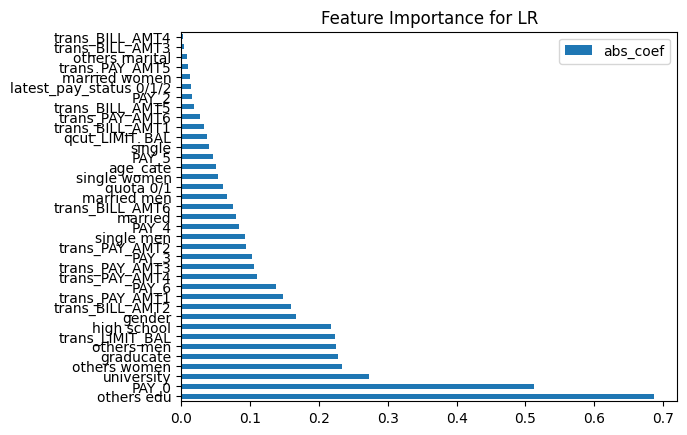

In [67]:
df_imp[["abs_coef"]].plot(kind="barh", title="Feature Importance for LR")

### Tree-based algorithm

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [69]:
dt = DecisionTreeClassifier(
    criterion="entropy", max_depth=5, min_samples_leaf=20, random_state=66, class_weight="balanced"
)

In [70]:
dt.fit(x_tr, y_tr)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, min_samples_leaf=20, random_state=66)

In [71]:
evaluate(dt)

Classification Report: 

               precision    recall  f1-score   support

           0       0.87      0.83      0.85      4687
           1       0.49      0.57      0.53      1313

    accuracy                           0.77      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.79      0.77      0.78      6000



In [72]:
rf = RandomForestClassifier(
    n_estimators=20, criterion="gini", min_samples_split=20, min_samples_leaf=50,
    class_weight="balanced",
    random_state=66
)

In [73]:
rf.fit(x_tr, y_tr)

RandomForestClassifier(class_weight='balanced', min_samples_leaf=50,
                       min_samples_split=20, n_estimators=20, random_state=66)

In [74]:
evaluate(rf)

Classification Report: 

               precision    recall  f1-score   support

           0       0.88      0.80      0.84      4687
           1       0.47      0.62      0.54      1313

    accuracy                           0.76      6000
   macro avg       0.68      0.71      0.69      6000
weighted avg       0.79      0.76      0.77      6000



In [75]:
xgbc = XGBClassifier(
    n_estimators=20, max_depth=5, max_leaves=20, random_state=66,
)

In [76]:
xgbc.fit(x_tr, y_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=20,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, random_state=66, ...)

In [77]:
evaluate(xgbc)

Classification Report: 

               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.66      0.36      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



### hyper-parameters tuning
The above models have been manually tuned.
Let's explore how much we can enhance performance through grid search.

In [78]:
from sklearn.experimental import enable_halving_search_cv # enable experimental function
from sklearn.model_selection import HalvingRandomSearchCV

In [79]:
lr = LogisticRegression(random_state=11, class_weight="balanced")
rf = RandomForestClassifier(random_state=11, class_weight="balanced")
xgbc = XGBClassifier(random_state=11)

In [80]:
lr_params = {
    "C": [1, 3, 5, 10, 20, 50],
    "max_iter": [100, 200, 300, 400, 500, 600, 700, 1000],
    "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}
rf_params = {
    "n_estimators": [5, 10, 15, 20, 30, 50, 100],
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 6, 7, 8, 9, 10, None],
    "max_leaf_nodes": [5, 10, 20, 100],
    "min_samples_split": [2, 5, 10, 20],
}
xgbc_params = {
    "n_estimators": [100, 200, 300, 400, 500],
    "learning_rate": [0.01, 0.05, 0.1],
    "booster": ["gbtree", "gblinear"],
    "gamma": [0, 0.5, 1],
    "reg_alpha": [0, 0.5, 1],
    "reg_lambda": [0.5, 1, 5],
}

In [81]:
config = {
    "lr": [lr, lr_params],
    "rf": [rf, rf_params],
    "xgbc": [xgbc, xgbc_params]
}

In [ ]:
results = {}
for name, cfg in config.items():
    print("Search for...", name)
    model, param = cfg
    search = HalvingRandomSearchCV(model, param, scoring="f1", random_state=0).fit(x_tr, y_tr)
    results[name] = search

In [83]:
results

{'lr': HalvingRandomSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                                    random_state=11),
                       param_distributions={'C': [1, 3, 5, 10, 20, 50],
                                            'max_iter': [100, 200, 300, 400, 500,
                                                         600, 700, 1000],
                                            'solver': ['newton-cg', 'lbfgs',
                                                       'liblinear', 'sag',
                                                       'saga']},
                       random_state=0, scoring='f1'),
 'rf': HalvingRandomSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                                        random_state=11),
                       param_distributions={'criterion': ['gini', 'entropy'],
                                            'max_depth': [3, 5, 6, 7, 8, 9, 10,
                             

In [84]:
# train models based on best_params
tuned_lr = LogisticRegression(
    random_state=11, class_weight="balanced", **results["lr"].best_params_)
tuned_rf = RandomForestClassifier(
    random_state=11, class_weight="balanced", **results["rf"].best_params_)
tuned_xgbc = XGBClassifier(
    random_state=11, **results["xgbc"].best_params_)

tuned_lr.fit(x_tr, y_tr)
tuned_rf.fit(x_tr, y_tr)
tuned_xgbc.fit(x_tr, y_tr)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=11, ...)

In [85]:
evaluate(tuned_lr)

Classification Report: 

               precision    recall  f1-score   support

           0       0.88      0.81      0.84      4687
           1       0.47      0.60      0.52      1313

    accuracy                           0.76      6000
   macro avg       0.67      0.70      0.68      6000
weighted avg       0.79      0.76      0.77      6000



In [86]:
evaluate(tuned_rf)

Classification Report: 

               precision    recall  f1-score   support

           0       0.88      0.82      0.85      4687
           1       0.48      0.58      0.53      1313

    accuracy                           0.77      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.79      0.77      0.78      6000



In [87]:
evaluate(tuned_xgbc)

Classification Report: 

               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.36      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



## The most important features

In [88]:
a = pd.DataFrame(tuned_lr.coef_.reshape(-1), columns=["lr"])
a["lr"] = np.abs(a["lr"])
a.index = FEATURE_COLS

b = pd.DataFrame(tuned_rf.feature_importances_, columns=["rf"])
b.index = FEATURE_COLS

c = pd.DataFrame(tuned_xgbc.feature_importances_, columns=["xgbc"])
c.index = FEATURE_COLS

df_imp = pd.concat([a, b, c], axis=1)
df_imp.shape

(37, 3)

In [89]:
df_imp.sort_values(["lr"], ascending=False).head()

lr        rf      xgbc
others edu    0.686953  0.000000  0.011795
PAY_0         0.512317  0.362937  0.437068
university    0.273346  0.000000  0.008155
others women  0.232505  0.000000  0.007760
graducate     0.227613  0.006813  0.010485

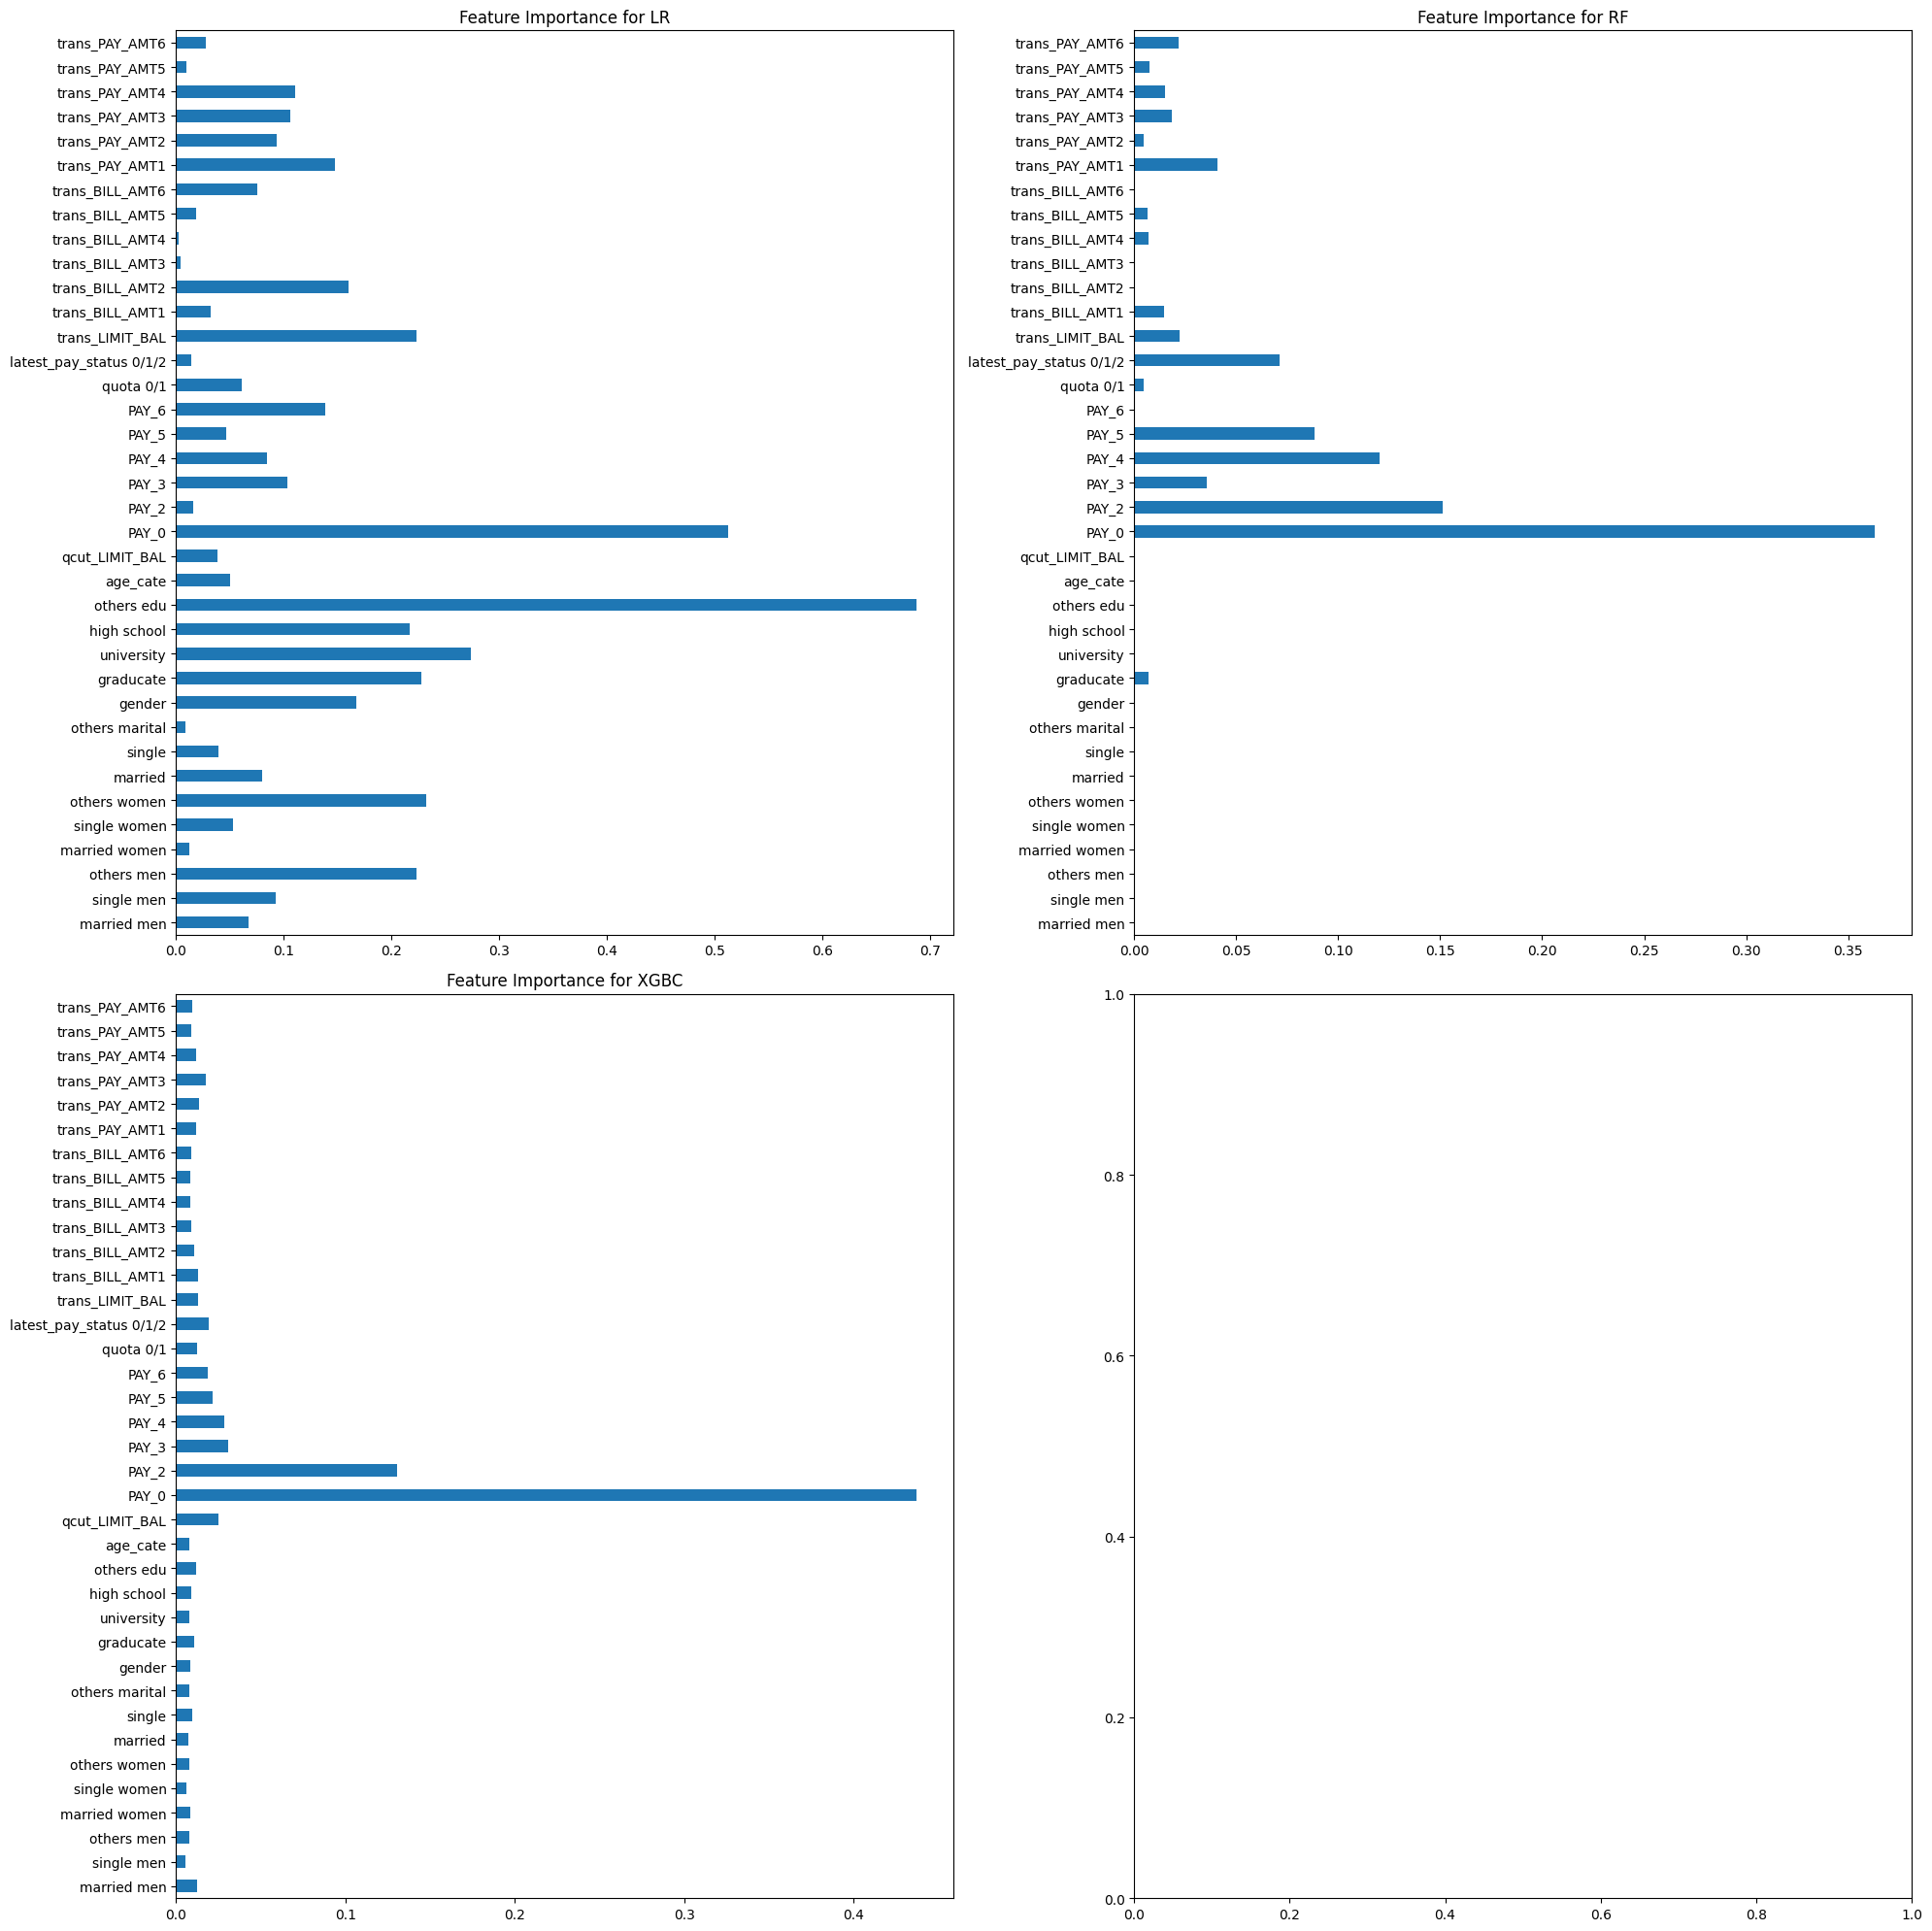

In [90]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
df_imp["lr"].plot(kind="barh", ax=axs[0,0], title="Feature Importance for LR")
df_imp["rf"].plot(kind="barh", ax=axs[0,1], title="Feature Importance for RF")
df_imp["xgbc"].plot(kind="barh", ax=axs[1,0], title="Feature Importance for XGBC")
plt.tight_layout()

In [91]:
pred = np.vstack((
    tuned_lr.predict_proba(x_te)[:, 1],
    tuned_rf.predict_proba(x_te)[:, 1],
    tuned_xgbc.predict_proba(x_te)[:, 1],
))
pred = np.mean(pred, axis=0)
pred.shape

(6000,)

In [92]:
r = classification_report(y_te, (pred >= 0.4) * 1)
print("Classification Report: \n\n {}".format(r))

Classification Report: 

               precision    recall  f1-score   support

           0       0.88      0.80      0.84      4687
           1       0.46      0.61      0.53      1313

    accuracy                           0.76      6000
   macro avg       0.67      0.71      0.68      6000
weighted avg       0.79      0.76      0.77      6000



## Case Study

In [93]:
probas = tuned_rf.predict_proba(x_te)
probas

array([[0.59335993, 0.40664007],
       [0.68739654, 0.31260346],
       [0.63718747, 0.36281253],
       ...,
       [0.6479386 , 0.3520614 ],
       [0.52103259, 0.47896741],
       [0.54210137, 0.45789863]])

In [94]:
fea_quota[idx_te]

array([0, 0, 0, ..., 0, 1, 0])

In [95]:
res = pd.DataFrame({
    "y": y_te,
    "p": probas[:, 1],
    "idx": idx_te,
    "quota": fea_quota[idx_te],
})

In [96]:
res[res["y"] == 1].sort_values(["p"])

y         p    idx  quota
3200  1  0.302995   5286      0
878   1  0.302995   1804      1
1482  1  0.302995   1555      1
5399  1  0.302995  28182      1
5658  1  0.302995   3623      0
...  ..       ...    ...    ...
903   1  0.832366  15062      0
215   1  0.832366   4985      0
1559  1  0.832366  18957      0
4345  1  0.832366   2375      0
3040  1  0.832366   4659      0

[1313 rows x 4 columns]

In [97]:
idx = res[res["y"] == 1].sort_values(["p"])[:10]["idx"].values
idx

array([ 5286,  1804,  1555, 28182,  3623, 28200, 13916, 24915, 24870,
       13328])

In [98]:
t = df.loc[idx]

In [99]:
# past payment status
t[["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]]

PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6
5286      -1     -1     -1     -1     -1     -1
1804      -1     -1     -1     -1     -1     -1
1555      -1     -1     -1     -1     -1     -1
28182     -1     -1     -1     -1     -1     -1
3623      -1     -1     -1     -1     -1     -1
28200     -1     -1     -1     -1     -1     -1
13916     -1     -1     -1     -1     -1     -1
24915     -1     -1     -1     -1     -1     -1
24870     -1     -1     -1     -1     -1     -1
13328     -1     -1     -1     -1     -1     -1

No delay payment history

In [100]:
t[["LIMIT_BAL", "SEX", "MARRIAGE", "EDUCATION", "AGE"]]

LIMIT_BAL  SEX  MARRIAGE  EDUCATION  AGE
5286    520000.0    2         2          1   33
1804    450000.0    1         2          1   31
1555    340000.0    1         1          1   52
28182   360000.0    2         2          1   33
3623    210000.0    1         2          1   36
28200   430000.0    2         2          1   36
13916   390000.0    2         2          1   35
24915   200000.0    1         3          1   47
24870   170000.0    1         1          1   37
13328   390000.0    2         2          1   31

In [101]:
sex_marr = [""] * df.shape[0]
for i in set(df["SEX"]):
    for j in set(df["MARRIAGE"]):
        for idx in df[(df["SEX"] == i) & (df["MARRIAGE"] == j)].index:
            sex_marr[idx] = f"SEX={i} MARR={j}"

In [102]:
corr_cols(sex_marr, df["def_pay"])

def_pay          0     1  percentage
SEX=1 MARR=1  3844  1346    0.259345
SEX=1 MARR=2  5068  1485    0.226614
SEX=1 MARR=3   103    42    0.289655
SEX=2 MARR=1  6609  1860    0.219625
SEX=2 MARR=2  7555  1856    0.197216
SEX=2 MARR=3   185    47    0.202586

`SEX=1 MARR=1` and `SEX=1 MARR=3` have higher default rate.

In [103]:
corr_cols(limit_bin, df["def_pay"])

/var/folders/tf/5b2m2xtn0gxbnhf4q4yhmcjc0000gq/T/ipykernel_48688/3674035607.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  res = df.groupby([col1, col2]).size().unstack()


def_pay                   0     1  percentage
LIMIT_BAL                                    
(9999.999, 50000.0]    5236  2440    0.317874
(50000.0, 140000.0]    5732  1882    0.247176
(140000.0, 240000.0]   6317  1326    0.173492
(240000.0, 1000000.0]  6079   988    0.139805

`LIMIT_BAL` higher than 14,000 has lower default rate.

In [104]:
t[[
    "LIMIT_BAL", "BILL_AMT1",
    "BILL_AMT2", "PAY_AMT1", 
    "BILL_AMT3", "PAY_AMT2", 
    "BILL_AMT4", "PAY_AMT3", 
    "BILL_AMT5", "PAY_AMT4", 
    "BILL_AMT6", "PAY_AMT5",
    "PAY_AMT6",
]]

LIMIT_BAL  BILL_AMT1  BILL_AMT2  PAY_AMT1  BILL_AMT3  PAY_AMT2  \
5286    520000.0   485298.0   499489.0   22000.0   413019.0   18300.0   
1804    450000.0    10350.0     3629.0    3629.0     3271.0    3271.0   
1555    340000.0    30832.0    33652.0   33670.0    35192.0   35212.0   
28182   360000.0     5334.0     6849.0    3017.0    68133.0   65009.0   
3623    210000.0   210463.0   109132.0    5187.0    47182.0    2043.0   
28200   430000.0   258212.0   232225.0   10500.0   237297.0   10300.0   
13916   390000.0   245997.0   243904.0   10800.0   244361.0    9110.0   
24915   200000.0   202967.0   203188.0    7208.0   198576.0    7282.0   
24870   170000.0   187146.0   175347.0    6500.0   181490.0    9000.0   
13328   390000.0   252109.0   252401.0   12009.0   180074.0    7508.0   

       BILL_AMT4  PAY_AMT3  BILL_AMT5  PAY_AMT4  BILL_AMT6  PAY_AMT5  PAY_AMT6  
5286    168770.0   26500.0   168964.0   30000.0   191188.0   27000.0   25000.0  
1804      6271.0    6271.0     2135.0    2135.0     2546.0    2546.0    4877.0  
1555     30000.0   30000.0    10766.0   10766.0    33887.0   33905.0   30200.0  
28182    71708.0    6784.0    58551.0    3041.0    54678.0    5044.0    3042.0  
3623     37067.0    1552.0    24511.0    2013.0    22634.0    3002.0    3003.0  
28200   240682.0    9000.0   245337.0    8541.0   242481.0    9054.0    8543.0  
13916   243287.0   10000.0   247613.0    9200.0   246330.0    9000.0   15000.0  
24915   186981.0    5835.0   137486.0    5000.0   140473.0    5500.0    4954.0  
24870   169608.0    7000.0   163255.0    3500.0   168395.0    7000.0    5000.0  
13328   178025.0    6000.0   198721.0   39604.0   162444.0    6341.0    5000.0

## Conclusion

While we have the option to engage in more feature engineering and experiment with additional models, including neural networks, It seems that these features may not effectively capture default payment behavior. In a real-world scenario, I would consider discussing this with colleagues in the business domain to gain insights into human judggement.

We observe that individuals with lower `LIMIT_BAL`(amount of given credit) tend to have a higher default rate. This could indicate that the bank has classified these individuals as high-risk customers. Therefore, this phenomenon might be the cause rather than the result.
I believe that there is room for extended research to predict whether a bank should consider rasing credit limit for customers with low `LIMIT_BAL`.